In [4]:

import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import PACKAGE_MP_3DLinear as linear3d
import post_processing as pp
sys.path.append(current_path+'/../calculate_tangent/')


## Initial

In [2]:
if __name__ == '__main__':
    # File name
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly/results/"
    TJ_energy_type_ave = "ave"
    TJ_energy_type_min = "min"
    TJ_energy_type_max = "max"

    npy_file_name_aniso_ave = f"p2_ori_ave_{TJ_energy_type_ave}E_264_5k_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_aniso_min = f"p_ori_ave_{TJ_energy_type_min}E_264_5k_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_aniso_max = f"p_ori_ave_{TJ_energy_type_max}E_264_5k_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_iso = "p_ori_ave_aveE_264_5k_multiCore64_delta0.0_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"

    # Initial data
    npy_file_aniso_ave = np.load(npy_file_folder + npy_file_name_aniso_ave)
    npy_file_aniso_min = np.load(npy_file_folder + npy_file_name_aniso_min)
    npy_file_aniso_max = np.load(npy_file_folder + npy_file_name_aniso_max)
    npy_file_iso = np.load(npy_file_folder + npy_file_name_iso)
    print(f"The ave data size is: {npy_file_aniso_ave.shape}")
    print(f"The min data size is: {npy_file_aniso_min.shape}")
    print(f"The max data size is: {npy_file_aniso_max.shape}")
    print(f"The iso data size is: {npy_file_iso.shape}")
    print("READING DATA DONE")

    # Initial container
    initial_grain_num = 5000
    step_num = npy_file_aniso_min.shape[0]
    grain_num_aniso_ave = np.zeros(step_num)
    grain_num_aniso_min = np.zeros(step_num)
    grain_num_aniso_max = np.zeros(step_num)
    grain_num_iso = np.zeros(step_num)

    # Calculate the number of grains
    for i in range(step_num):
        grain_num_aniso_ave[i] = len(set(npy_file_aniso_ave[i,:].flatten()))
        grain_num_aniso_min[i] = len(set(npy_file_aniso_min[i,:].flatten()))
        grain_num_aniso_max[i] = len(set(npy_file_aniso_max[i,:].flatten()))
        grain_num_iso[i] = len(set(npy_file_iso[i,:].flatten()))

    expected_grain_num = 200
    special_step_distribution_ave = int(np.argmin(abs(grain_num_aniso_ave - expected_grain_num)))
    special_step_distribution_min = int(np.argmin(abs(grain_num_aniso_min - expected_grain_num)))
    special_step_distribution_max = int(np.argmin(abs(grain_num_aniso_max - expected_grain_num)))
    special_step_distribution_iso = int(np.argmin(abs(grain_num_iso - expected_grain_num)))

The ave data size is: (76, 264, 264, 264)
The min data size is: (76, 264, 264, 264)
The max data size is: (76, 264, 264, 264)
The iso data size is: (76, 264, 264, 264)
READING DATA DONE


In [23]:
print(special_step_distribution_ave)
print(special_step_distribution_min)
print(special_step_distribution_max)
print(special_step_distribution_iso)
grain_num_aniso_min

46
75
50
44


array([5000., 4949., 4685., 4350., 4036., 3739., 3493., 3259., 3037.,
       2848., 2644., 2498., 2359., 2204., 2073., 1978., 1880., 1785.,
       1692., 1578., 1503., 1436., 1359., 1281., 1233., 1196., 1144.,
       1093., 1046., 1010.,  984.,  951.,  916.,  887.,  857.,  828.,
        797.,  771.,  738.,  720.,  698.,  672.,  654.,  640.,  616.,
        597.,  586.,  562.,  549.,  533.,  512.,  499.,  479.,  464.,
        449.,  438.,  428.,  415.,  410.,  406.,  398.,  389.,  377.,
        365.,  355.,  343.,  338.,  334.,  329.,  320.,  309.,  303.,
        292.,  286.,  282.,  274.])

## plot

/scratch/local/21179043/ipykernel_2591277/651468037.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')
/scratch/local/21179043/ipykernel_2591277/651468037.py:90: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')
/scratch/local/21179043/ipykernel_2

Text(1.5707963267948966, 0.0095, 'z')

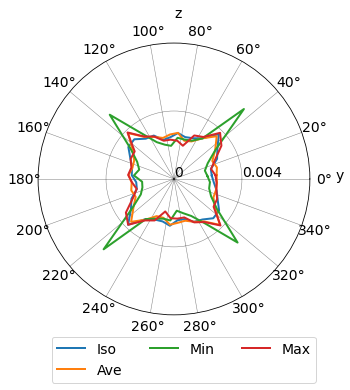

In [5]:
    # FIGURE BEFORE REMOVING BIAS - DON'T SAVE FIG AND ONLY KEEP BIAS
    # Start polar figure xy
    plt.close()
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca(projection='polar')

    ax.set_thetagrids(np.arange(0.0, 360.0, 20.0),fontsize=14)
    ax.set_thetamin(0.0)
    ax.set_thetamax(360.0)

    ax.set_rgrids(np.arange(0, 0.008, 0.004))
    ax.set_rlabel_position(0.0)  # start from 0 degree
    ax.set_rlim(0.0, 0.008)  # radiu lim range is from 0 to 0.008
    ax.set_yticklabels(['0', '0.004'],fontsize=14)

    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites, _ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso")
    # For bias
    xLim = [0, 360]
    binValue = 10.01
    binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue)
    freqArray_circle = np.ones(binNum)
    freqArray_circle = freqArray_circle/sum(freqArray_circle*binValue)
    slope_list_bias = freqArray_circle - slope_list

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites, _ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave")

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min")

    # Aniso - max
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max")

    plt.legend(loc=(0.05,-0.25),fontsize=14, ncol=3)
    plt.text(0.0, 0.0095, "x", fontsize=14)
    plt.text(np.pi/2, 0.0095, "y", fontsize=14)
    # plt.savefig(current_path + f"/figures/normal_distribution_3d_xy_{expected_grain_num}grains.png", dpi=400,bbox_inches='tight')

    # Start polar figure xz
    plt.close()
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca(projection='polar')

    ax.set_thetagrids(np.arange(0.0, 360.0, 20.0),fontsize=14)
    ax.set_thetamin(0.0)
    ax.set_thetamax(360.0)

    ax.set_rgrids(np.arange(0, 0.008, 0.004))
    ax.set_rlabel_position(0.0)  # start from 0 degree
    ax.set_rlim(0.0, 0.008)  # radiu lim range is from 0 to 0.008
    ax.set_yticklabels(['0', '0.004'],fontsize=14)

    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso", 1)
     # For bias
    xLim = [0, 360]
    binValue = 10.01
    binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue)
    freqArray_circle = np.ones(binNum)
    freqArray_circle = freqArray_circle/sum(freqArray_circle*binValue)
    slope_list_bias_1 = freqArray_circle - slope_list

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave", 1)

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min", 1)

    # Aniso - max
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max", 1)

    plt.legend(loc=(0.05,-0.25),fontsize=14, ncol=3)
    plt.text(0.0, 0.0095, "x", fontsize=14)
    plt.text(np.pi/2, 0.0095, "z", fontsize=14)
    # plt.savefig(current_path + f"/figures/normal_distribution_3d_xz_{expected_grain_num}grains.png", dpi=400,bbox_inches='tight')


    # Start polar figure yz
    plt.close()
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca(projection='polar')

    ax.set_thetagrids(np.arange(0.0, 360.0, 20.0),fontsize=14)
    ax.set_thetamin(0.0)
    ax.set_thetamax(360.0)

    ax.set_rgrids(np.arange(0, 0.008, 0.004))
    ax.set_rlabel_position(0.0)  # start from 0 degree
    ax.set_rlim(0.0, 0.008)  # radiu lim range is from 0 to 0.008
    ax.set_yticklabels(['0', '0.004'],fontsize=14)

    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso", 2)
    # For bias
    xLim = [0, 360]
    binValue = 10.01
    binNum = round((abs(xLim[0])+abs(xLim[1]))/binValue)
    freqArray_circle = np.ones(binNum)
    freqArray_circle = freqArray_circle/sum(freqArray_circle*binValue)
    slope_list_bias_2 = freqArray_circle - slope_list

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave", 2)

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min", 2)

    # Aniso - max
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max", 2)

    plt.legend(loc=(0.05,-0.25),fontsize=14, ncol=3)
    plt.text(0.0, 0.0095, "y", fontsize=14)
    plt.text(np.pi/2, 0.0095, "z", fontsize=14)
    # plt.savefig(current_path + f"/figures/normal_distribution_3d_yz_{expected_grain_num}grains.png", dpi=400,bbox_inches='tight')




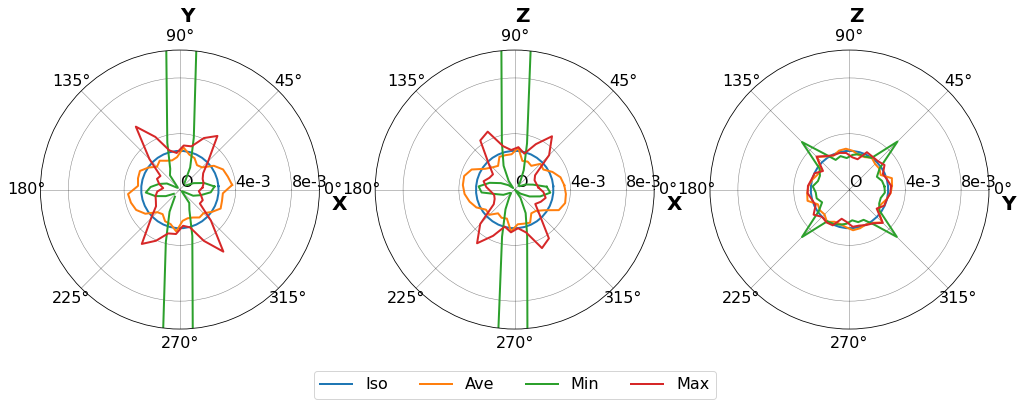

In [21]:

    # After removing bias
    # Start polar figure xy
    fig = plt.figure(figsize=(17, 15))
    ax1 = plt.subplot(131, projection='polar')

    ax1.set_thetagrids(np.arange(0.0, 360.0, 45.0),fontsize=16)
    ax1.set_thetamin(0.0)
    ax1.set_thetamax(360.0)

    ax1.set_rgrids(np.arange(0, 0.010, 0.004))
    ax1.set_rlabel_position(0.0)  # start from 0 degree
    ax1.set_rlim(0.0, 0.010)  # radiu lim range is from 0 to 0.008
    ax1.set_yticklabels(['O', '4e-3', '8e-3'], fontsize=16)

    ax1.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax1.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso", 0, slope_list_bias)

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave", 0, slope_list_bias)

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min", 0, slope_list_bias)

    # Aniso - sum
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max", 0, slope_list_bias)

    plt.text(-np.pi/24, 0.011, "X", fontsize=20, weight='bold')
    plt.text(np.pi/2, 0.012, "Y", fontsize=20, weight='bold')

    # Start polar figure xz
    ax2 = plt.subplot(132, projection='polar')

    ax2.set_thetagrids(np.arange(0.0, 360.0, 45.0),fontsize=16)
    ax2.set_thetamin(0.0)
    ax2.set_thetamax(360.0)

    ax2.set_rgrids(np.arange(0, 0.010, 0.004))
    ax2.set_rlabel_position(0.0)  # start from 0 degree
    ax2.set_rlim(0.0, 0.010)  # radiu lim range is from 0 to 0.008
    ax2.set_yticklabels(['O', '4e-3', '8e-3'], fontsize=16)

    ax2.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax2.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso", 1, slope_list_bias_1)

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave", 1, slope_list_bias_1)

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min", 1, slope_list_bias_1)

    # Aniso - max
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max", 1, slope_list_bias_1)

    plt.legend(loc=(-0.22,-0.25),fontsize=16, ncol=4)
    plt.text(-np.pi/24, 0.011, "X", fontsize=20, weight='bold')
    plt.text(np.pi/2, 0.012, "Z", fontsize=20, weight='bold')

    # Start polar figure yz
    ax3 = plt.subplot(133, projection='polar')

    ax3.set_thetagrids(np.arange(0.0, 360.0, 45.0),fontsize=16)
    ax3.set_thetamin(0.0)
    ax3.set_thetamax(360.0)

    ax3.set_rgrids(np.arange(0, 0.010, 0.004))
    ax3.set_rlabel_position(0.0)  # start from 0 degree
    ax3.set_rlim(0.0, 0.010)  # radiu lim range is from 0 to 0.008
    ax3.set_yticklabels(['O', '4e-3', '8e-3'], fontsize=16)

    ax3.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)
    ax3.set_axisbelow('True')

    # Iso
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_iso_P_step{special_step_distribution_iso}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_iso_sites_step{special_step_distribution_iso}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_iso[special_step_distribution_iso,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_iso, "Iso", 2, slope_list_bias_2)

    # Aniso - ave
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_ave_P_step{special_step_distribution_ave}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_ave_sites_step{special_step_distribution_ave}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_ave[special_step_distribution_ave,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_ave, "Ave", 2, slope_list_bias_2)

    # Aniso - min
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_step{special_step_distribution_min}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_min_P_sites_step{special_step_distribution_min}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_min[special_step_distribution_min,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_min, "Min", 2, slope_list_bias_2)

    # Aniso - max
    data_file_name_P = f'/3D_normal_distribution_data/3D_normal_distribution_max_P_step{special_step_distribution_max}.npy'
    data_file_name_sites = f'/3D_normal_distribution_data/3D_normal_distribution_max_sites_step{special_step_distribution_max}.npy'
    if os.path.exists(current_path + data_file_name_P):
        P = np.load(current_path + data_file_name_P)
        sites = np.load(current_path + data_file_name_sites)
    else:
        newplace = np.rot90(npy_file_aniso_max[special_step_distribution_max,:,:,:], 1, (0,1))
        P, sites,_ = pp.get_normal_vector_3d(newplace)
        np.save(current_path + data_file_name_P, P)
        np.save(current_path + data_file_name_sites, sites)

    slope_list = pp.get_normal_vector_slope_3d(P, sites, special_step_distribution_max, "Max", 2, slope_list_bias_2)

    plt.text(-np.pi/24, 0.011, "Y", fontsize=20, weight='bold')
    plt.text(np.pi/2, 0.012, "Z", fontsize=20, weight='bold')
    plt.savefig(current_path + f"/figures/normal_distribution_3d_all3_{expected_grain_num}grains_after_removing_bias.png", dpi=400,bbox_inches='tight')
